new_lr 1
new_lr 1.0
epoch:    0, lr:[1.0, 0.95]
new_lr 0.95
epoch:    1, lr:[1.0, 0.9025]
new_lr 0.9025
epoch:    2, lr:[1.0, 0.8573749999999999]
new_lr 0.8573749999999999
epoch:    3, lr:[1.0, 0.8145062499999999]
new_lr 0.8145062499999999
epoch:    4, lr:[1.0, 0.7737809374999998]
new_lr 0.7737809374999998
epoch:    5, lr:[1.0, 0.7350918906249998]
new_lr 0.7350918906249998
epoch:    6, lr:[1.0, 0.6983372960937497]
new_lr 0.6983372960937497
epoch:    7, lr:[1.0, 0.6634204312890623]
new_lr 0.6634204312890623
epoch:    8, lr:[1.0, 0.6302494097246091]
new_lr 0.6302494097246091
epoch:    9, lr:[1.0, 0.5987369392383787]
new_lr 0.5987369392383787
epoch:   10, lr:[1.0, 0.5688000922764597]
new_lr 0.5688000922764597
epoch:   11, lr:[1.0, 0.5403600876626367]
new_lr 0.5403600876626367
epoch:   12, lr:[1.0, 0.5133420832795048]
new_lr 0.5133420832795048
epoch:   13, lr:[1.0, 0.48767497911552954]
new_lr 0.48767497911552954
epoch:   14, lr:[1.0, 0.48767497911552954]
new_lr 0.48767497911552954
epoch:  

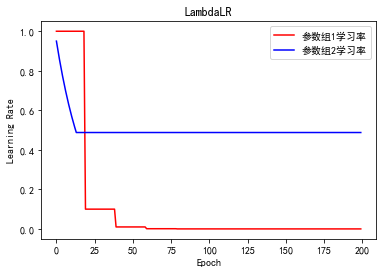

In [7]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

lr_init = 1
iteration = 10
max_epoch = 200
weights_1 = torch.randn((6, 3, 5, 5))
weights_2 = torch.ones((5, 5))

optimizer = optim.SGD([
    {'params': [weights_1]},
    {'params': [weights_2]}], lr=lr_init)

# 优化器第一个参数组学习率的调整方式(函数的输入为Epoch)
lambda1 = lambda epoch1: 0.1 ** (epoch1 // 20)


def func2(epoch2):
    """优化器第二个参数组学习率的调整方式"""
    new_lr = optimizer.param_groups[1]['lr']
    print("new_lr", new_lr)
    if new_lr <= 0.5:
        return new_lr  # 设置此时学习率不再下降
    return 0.95 ** epoch2


# 对应的学习率 *= 对应函数的输出
scheduler = optim.lr_scheduler.LambdaLR(optimizer,  # 调节的是优化器lr参数
                                        lr_lambda=[lambda1, func2])
'''
lr_lambda (function or list) –
    A function which computes a multiplicative factor given an integer parameter epoch,
    or a list of such functions, one for each group in optimizer.param_groups.
'''

lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):
    for i in range(iteration):
        optimizer.zero_grad()
        optimizer.step()

    scheduler.step()
    lr_list.append(scheduler.
                   get_last_lr())  # Return last computed learning rate by current scheduler
    epoch_list.append(epoch)

    print('epoch:{:5d}, lr:{}'.format(epoch, scheduler.get_last_lr()))

plt.plot(epoch_list, [i[0] for i in lr_list], label="参数组1学习率", color='r')
plt.plot(epoch_list, [i[1] for i in lr_list], label="参数组2学习率", color='b')
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("LambdaLR")
plt.legend()
plt.show()
